In [7]:
# %pip install pandas
# %pip install SQLAlchemy
# %pip install pymysql
# %pip install pm4py

In [8]:
from sqlalchemy import create_engine
import pandas as pd
import os
import pm4py
# read mysql env v

In [9]:
mysql_user = os.environ['MYSQL_USER']
mysql_password = os.environ['MYSQL_PASSWORD']
mysql_host = os.environ['MYSQL_HOST']
mysql_db = os.environ['MYSQL_DB']

print(mysql_user, mysql_password, mysql_host, mysql_db)

# create connection string
db_connection_str = f'mysql+pymysql://{mysql_user}:{mysql_password}@{mysql_host}/{mysql_db}'
db_connection = create_engine(db_connection_str)

df = pd.read_sql('SELECT * FROM LAS2PEERMON.MESSAGE WHERE CASE_ID IS NOT NULL', con=db_connection)
df.head()



root root localhost:8085 LAS2PEERMON


,ID,EVENT,TIME_STAMP,SOURCE_NODE,SOURCE_AGENT,DESTINATION_NODE,DESTINATION_AGENT,REMARKS,CASE_ID,ACTIVITY_NAME,RESOURCE,RESOURCE_TYPE,LIFECYCLE_PHASE,TIME_OF_EVENT
0,452,SERVICE_CUSTOM_MESSAGE_1,2023-07-21 10:51:34,<0xE6C0F6..>,ab076fdfcb8248b8551819576e1f177c,,,"{""msg"": ""41de37a21eb0fbd7c8f2e57360ba443ce8f40...",df01e7b1-b4b1-4045-9820-3ab2fd3699fc,greeting,MensaBot,bot,start,2023-07-21 08:51:34
1,453,SERVICE_CUSTOM_MESSAGE_1,2023-07-21 10:51:34,<0xE6C0F6..>,ab076fdfcb8248b8551819576e1f177c,,,"{""msg"": ""41de37a21eb0fbd7c8f2e57360ba443ce8f40...",df01e7b1-b4b1-4045-9820-3ab2fd3699fc,greeting,MensaBot,bot,complete,2023-07-21 08:51:34
2,454,SERVICE_CUSTOM_MESSAGE_2,2023-07-21 10:51:34,<0xE6C0F6..>,ab076fdfcb8248b8551819576e1f177c,,,"{""msg"": """"}",df01e7b1-b4b1-4045-9820-3ab2fd3699fc,greeting:response,MensaBot,bot,start,2023-07-21 08:51:34
3,455,SERVICE_CUSTOM_MESSAGE_2,2023-07-21 10:51:34,<0xE6C0F6..>,ab076fdfcb8248b8551819576e1f177c,,,"{""msg"": """"}",df01e7b1-b4b1-4045-9820-3ab2fd3699fc,greeting:response,MensaBot,bot,complete,2023-07-21 08:51:34
4,458,SERVICE_CUSTOM_MESSAGE_1,2023-07-21 10:53:24,<0xE6C0F6..>,ab076fdfcb8248b8551819576e1f177c,,,"{""msg"": ""41de37a21eb0fbd7c8f2e57360ba443ce8f40...",0b3a0dfd-e7f0-41ec-97fd-142d1b11aa52,help,MensaBot,bot,start,2023-07-21 08:53:24


In [10]:
# rename columns CASE_ID->case:concept:name, ACTIVITY_NAME->concept:name, TIME_OF_EVENT->time:timestamp, LIFECYCLE_PHASE->lifecycle:transition
df.rename(columns={'CASE_ID': 'case:concept:name', 'ACTIVITY_NAME': 'concept:name', 'TIME_OF_EVENT': 'time:timestamp', 'LIFECYCLE_PHASE': 'lifecycle:transition'}, inplace=True)
# only keep events with lifecycle:transition=complete
df = df[df['lifecycle:transition']=='complete']

df.head()


,ID,EVENT,TIME_STAMP,SOURCE_NODE,SOURCE_AGENT,DESTINATION_NODE,DESTINATION_AGENT,REMARKS,case:concept:name,concept:name,RESOURCE,RESOURCE_TYPE,lifecycle:transition,time:timestamp
1,453,SERVICE_CUSTOM_MESSAGE_1,2023-07-21 10:51:34,<0xE6C0F6..>,ab076fdfcb8248b8551819576e1f177c,,,"{""msg"": ""41de37a21eb0fbd7c8f2e57360ba443ce8f40...",df01e7b1-b4b1-4045-9820-3ab2fd3699fc,greeting,MensaBot,bot,complete,2023-07-21 08:51:34
3,455,SERVICE_CUSTOM_MESSAGE_2,2023-07-21 10:51:34,<0xE6C0F6..>,ab076fdfcb8248b8551819576e1f177c,,,"{""msg"": """"}",df01e7b1-b4b1-4045-9820-3ab2fd3699fc,greeting:response,MensaBot,bot,complete,2023-07-21 08:51:34
5,459,SERVICE_CUSTOM_MESSAGE_1,2023-07-21 10:53:24,<0xE6C0F6..>,ab076fdfcb8248b8551819576e1f177c,,,"{""msg"": ""41de37a21eb0fbd7c8f2e57360ba443ce8f40...",0b3a0dfd-e7f0-41ec-97fd-142d1b11aa52,help,MensaBot,bot,complete,2023-07-21 08:53:24
7,461,SERVICE_CUSTOM_MESSAGE_2,2023-07-21 10:53:24,<0xE6C0F6..>,ab076fdfcb8248b8551819576e1f177c,,,"{""msg"": """"}",0b3a0dfd-e7f0-41ec-97fd-142d1b11aa52,help:response,MensaBot,bot,complete,2023-07-21 08:53:24
9,465,SERVICE_CUSTOM_MESSAGE_1,2023-07-21 10:53:44,<0xE6C0F6..>,ab076fdfcb8248b8551819576e1f177c,,,"{""msg"": ""41de37a21eb0fbd7c8f2e57360ba443ce8f40...",0e96bbb1-f7f5-4806-931a-6bcecd028372,menu,MensaBot,bot,complete,2023-07-21 08:53:44


In [11]:

# to event log
pm4py.write_xes(df, 'test', case_id_key='case:concept:name')


exporting log, completed traces :: 100%|██████████| 3/3 [00:00<00:00, 8671.89it/s]


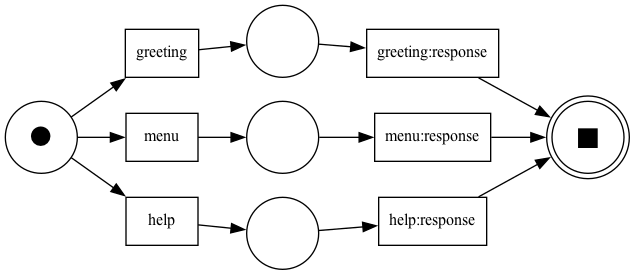

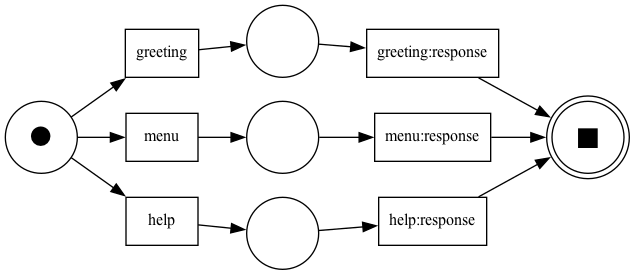

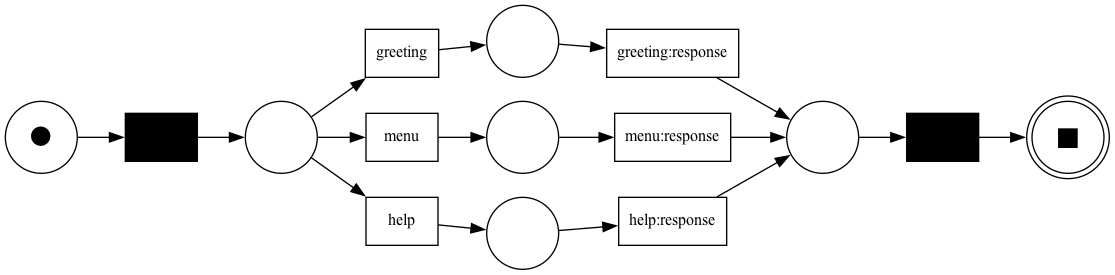

{('help', 'help:response'): 1,
 ('menu', 'menu:response'): 1,
 ('greeting', 'greeting:response'): 1}

In [12]:
# learn a bpmn model
petri_net_alpha, initial_marking_alpha, final_marking_alpha = pm4py.discovery.discover_petri_net_alpha(df)
petri_net_heuristics, initial_marking_heuristics, final_marking_heuristics = pm4py.discovery.discover_petri_net_heuristics(df)
petri_net_inductive, initial_marking_inductive, final_marking_inductive = pm4py.discovery.discover_petri_net_inductive(df, noise_threshold=0.2)

# visualize
pm4py.view_petri_net(petri_net_alpha, initial_marking_alpha, final_marking_alpha)
pm4py.view_petri_net(petri_net_heuristics, initial_marking_heuristics, final_marking_heuristics)
pm4py.view_petri_net(petri_net_inductive, initial_marking_inductive, final_marking_inductive)

variants = pm4py.get_variants(df)   
variants